<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality Reduction</a></span><ul class="toc-item"><li><span><a href="#The-Problem" data-toc-modified-id="The-Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Problem</a></span><ul class="toc-item"><li><span><a href="#Multi-Collinearity" data-toc-modified-id="Multi-Collinearity-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Multi-Collinearity</a></span></li></ul></li><li><span><a href="#Sparsity" data-toc-modified-id="Sparsity-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sparsity</a></span></li></ul></li><li><span><a href="#Principle-Component-Analysis" data-toc-modified-id="Principle-Component-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Principle Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Important-Points:" data-toc-modified-id="Important-Points:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Important Points:</a></span></li></ul></li><li><span><a href="#Singular-Value-Decomposition" data-toc-modified-id="Singular-Value-Decomposition-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Singular Value Decomposition</a></span><ul class="toc-item"><li><span><a href="#Measuring-the-Quality-of-the-Reconstruction" data-toc-modified-id="Measuring-the-Quality-of-the-Reconstruction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Measuring the Quality of the Reconstruction</a></span></li><li><span><a href="#Heuristic-Step-for-How-Many-Dimensions-to-Keep" data-toc-modified-id="Heuristic-Step-for-How-Many-Dimensions-to-Keep-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Heuristic Step for How Many Dimensions to Keep</a></span></li></ul></li><li><span><a href="#GLOVE" data-toc-modified-id="GLOVE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GLOVE</a></span><ul class="toc-item"><li><span><a href="#Using-Spacy-word2vec-embeddings" data-toc-modified-id="Using-Spacy-word2vec-embeddings-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using Spacy word2vec embeddings</a></span></li><li><span><a href="#Using-Glove" data-toc-modified-id="Using-Glove-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using Glove</a></span></li></ul></li><li><span><a href="#Clustering-Text" data-toc-modified-id="Clustering-Text-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering Text</a></span></li></ul></div>

# Dimensionality Reduction

## The Problem

There is an interesting tradeoff between model performance and a feature's dimensionality:
![http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/](images/dimensionality_vs_performance.png)

>*If the amount of available training data is fixed, then overfitting occurs if we keep adding dimensions. On the other hand, if we keep adding dimensions, the amount of **training data needs to grow exponentially fast to maintain the same coverage** and to avoid overfitting* ([Computer Vision for Dummies](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)).

![http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/](images/curseofdimensionality.png)

### Multi-Collinearity

In many cases, there is a high degree of correlation between many of the features in a dataset. This multi-collinearity has the effect of drowning out the "signal" of your dataset in many cases, and amplifies "outlier" noise.


## Sparsity

- High dimensionality increases the sparsity of your features (**what NLP techniques have we used that illustrate this point?**)
- The density of the training samples decreases when dimensionality increases:
- **Distance measures (Euclidean, for instance) start losing their effectiveness**, because there isn't much difference between the max and min distances in higher dimensions.
- Many models that rely upon **assumptions of Gaussian distributions** (like OLS linear regression), Gaussian mixture models, Gaussian processes, etc. become less and less effective since their distributions become flatter and "fatter tailed".
![http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/](images/distance-asymptote.png)

What is the amount of data needed to maintain **20% coverage** of the feature space? For 1 dimension, it is **20% of the entire population's dataset**. For a dimensionality of $D$:

$$
X^{D} = .20
$$
$$
(X^{D})^{\frac{1}{D}} = .20^{\frac{1}{D}}
$$
$$
X = \sqrt[D]{.20}
$$
You can approximate this as 
```python
def coverage_requirement(requirement, D):
    return requirement ** (1 / D)

x = []
y = []
for d in range(1,20):
    y.append(coverage_requirement(0.10, d))
    x.append(d)
    
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel("Number of Dimensions")
plt.ylabel("Appromximate % of Population Dataset")
plt.title("% of Dataset Needed to Maintain 10% Coverage of Feature Space")
plt.show()
```
<img src="images/coverage-needed.png" width="500">

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
reviews = pd.read_csv("mcdonalds-yelp-negative-reviews.csv", encoding='latin-1')
reviews = open("poor_amazon_toy_reviews.txt", encoding='latin-1')

#text = reviews["review"].values
text = reviews.readlines()

vectorizer = CountVectorizer(ngram_range=(3,3), min_df=0.01, max_df=0.75, max_features=200)
# tokenize and build vocab
vectorizer.fit(text)
vector = vectorizer.transform(text)
features = vector.toarray()
features_df = pd.DataFrame(features, columns=vectorizer.get_feature_names())

correlations = features_df.corr()
correlations_stacked = correlations.stack().reset_index()
#set column names
correlations_stacked.columns = ['Tri-Gram 1','Tri-Gram 2','Correlation']
correlations_stacked = correlations_stacked[correlations_stacked["Correlation"] < 1]
correlations_stacked = correlations_stacked.sort_values(by=['Correlation'], ascending=False)
correlations_stacked.head()

,Tri-Gram 1,Tri-Gram 2,Correlation
43,don waste your,waste your money,0.777888
197,waste your money,don waste your,0.777888
82,of the box,out of the,0.609369
110,out of the,of the box,0.609369
123,this for my,my year old,0.078176


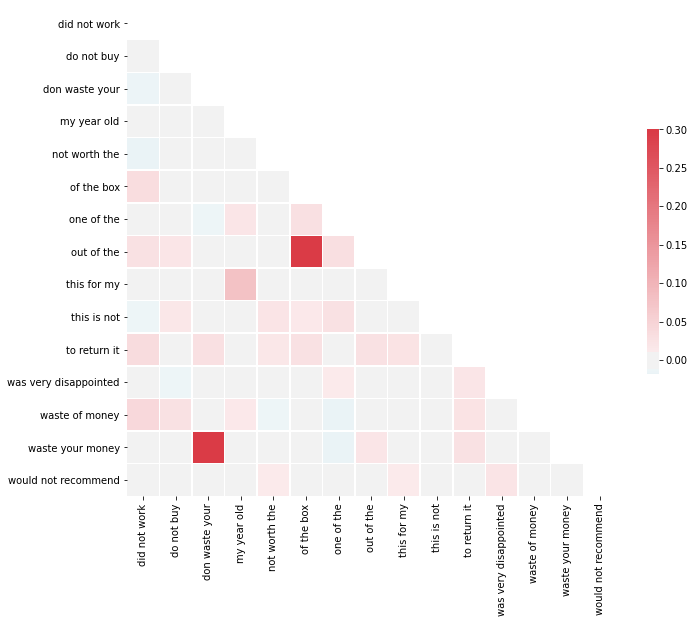

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# visualize the correlations (install seaborn first)!
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



# Principle Component Analysis

If you have an original matrix $Z$, you can decompose this matrix into two smaller matrices $X$ and $Q$. 

## Important Points:

- Multiplying a vector by a matrix typically changes the direction of the vector. For instance:
<figure>
  <img src="images/multvector.png" alt="my alt text"/>
    <figcaption><a href="https://lazyprogrammer.me/tutorial-principal-components-analysis-pca">Lazy Programmer- 
        Tutorial to PCA</a></figcaption>
</figure>

However, there are eigenvalues λ and eigenvectors $v$ such that

$$
\sum_{X}v = \lambda v
$$

Multiplying the eigenvectors $v$ with the eigenvalue $\lambda$ does not change the direction of the eigenvector.

Multiplying the eigenvector $v$ by the covariance matrix $\sum_{X}$ also does not change the direction of the eigenvector.

If our data $X$ is of shape $N \times D$, it turns out that we have $D$ eigenvalues and $D$ eigenvectors. This means we can arrange the eigenvalues $\lambda$ in decreasing order so that

$$
\lambda_3 > \lambda_2 > \lambda_5
$$

In this case, $\lambda_3$ is the largest eigenvalue, followed by $\lambda_2$, and then $\lambda_5$. Then, we can arrange 

We can also rearrange the eigenvectors the same: $v_3$ will be the first column, $v_2$ will be the second column, and $v_5$ will be the third column.

We'll end up with two matrices $V$ and $\Lambda$:
<figure>
  <img src="images/pca1.png" alt="my alt text"/>
    <figcaption><a href="https://lazyprogrammer.me/tutorial-principal-components-analysis-pca">Lazy Programmer- 
        Tutorial to PCA</a></figcaption>
</figure>

In [1]:
# what is the shape of our features?
features.shape

NameError: name 'features' is not defined

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
Z = pca.fit_transform(features)

# what is the shape of Z?
Z.shape

(12700, 4)

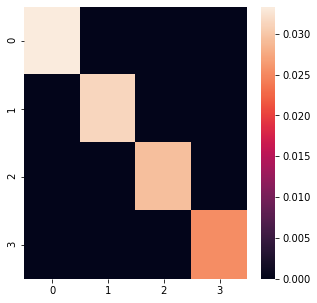

In [13]:
# what will happen if we take the correlation matrix and covariance matrix of our new reduced features?
import numpy as np
covariances = pd.DataFrame(np.cov(Z.transpose()))
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(covariances)

In [14]:
# train the model to reduce the dimensions down to 2
pca = PCA(n_components=2)
Z_two_dimensions = pca.fit_transform(features)
Z_two_dimensions

array([[ 0.19595259, -0.05187769],
       [-0.03897472, -0.02642106],
       [-0.03897472, -0.02642106],
       ...,
       [-0.03897472, -0.02642106],
       [-0.03897472, -0.02642106],
       [-0.03897472, -0.02642106]])

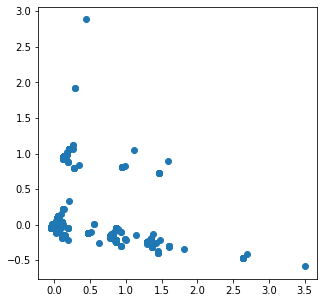

In [15]:
import matplotlib.pyplot as plt

plt.scatter(Z_two_dimensions[:,0], Z_two_dimensions[:, 1])
reduced_features_df = pd.DataFrame(Z_two_dimensions, columns=["x1", "x2"])
reduced_features_df["text"] = text

# Singular Value Decomposition

Given an input matrix $A$, we want to try to represent it instead as three smaller matrices $U$, $\sum$, and $V$. Instead of **$n$ original terms**, we want to represent each document as **$r$ concepts** (other referred to as **latent dimensions**, or **latent factors**):
<figure>
  <img src="images/svd.png" alt="my alt text"/>
    <figcaption><i>
        <a href="https://www.youtube.com/watch?v=P5mlg91as1c">Mining of Massive Datasets - Dimensionality Reduction: Singular Value Decomposition</a> by Leskovec, Rajaraman, and Ullman (Stanford University)</i></figcaption>
</figure>

Here, **$A$ is your matrix of word vectors** - you could use any of the word vectorization techniques we have learned so far, include one-hot encoding, word count, TF-IDF.

- $\sum$ will be a **diagonal matrix** with values that are positive and sorted in decreasing order. Its value indicate the **variance (information encoded on that new dimension)**- therefore, the higher the value, the stronger that dimension is in capturing data from A, the original features. For our purposes, we can think of the rank of this $\sum$ matrix as the number of desired dimensions. Instance, if we want to reduce $A$ from shape $1020 x 300$ to $1020 x 10$, we will want to reduce the rank of $\sum$ from 300 to 10.

- $U^T U = I$ and $V^T V = I$

## Measuring the Quality of the Reconstruction

A popular metric used for measuring the quality of the reconstruction is the [Frobenius Norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm). When you explain your methodology for reducing dimensions, usually managers / stakeholders will want to some way to compare multiple dimensionality techniques' ability to quantify its ability to retain information but trim dimensions:

$$
\begin{equation}
||A_{old}-A_{new}||_{F} = \sqrt{\sum_{ij}{(A^{old}_{ij}- A^{new}_{ij}}})^2
\end{equation}
$$

## Heuristic Step for How Many Dimensions to Keep

1. Sum the $\sum$ matrix's diagonal values: 
$$
\begin{equation}
\sum_{i}^{m}\sigma_{i}
\end{equation}
$$

2. Define your threshold of "information" (variance) $\alpha$ to keep: usually 80% to 90%. 

3. Define your cutoff point $C$: $$
\begin{equation}
C = \sum_{i}^{m}\sigma_{i} \alpha
\end{equation}
$$

4. Beginning with your largest singular value, sum your singular values $\sigma_{i}$ until it is greater than C. Retain only those dimensions.

<figure>
  <img src="images/userratings.png" alt="my alt text"/>
    <figcaption><i>
        <a href="https://www.youtube.com/watch?v=P5mlg91as1c">Mining of Massive Datasets - Dimensionality Reduction: Singular Value Decomposition</a> by Leskovec, Rajaraman, and Ullman (Stanford University)</i></figcaption>
</figure>


In [ ]:
# create sample data

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
x = np.linspace(1,20, 20) # create the first dimension
x = np.concatenate((x,x))
y = x + np.random.normal(0,1, 40) # create the second dimension
z = x + np.random.normal(0,2, 40) # create the third dimension
a = x + np.random.normal(0,4, 40) # create the fourth dimension
plt.scatter(x,y) # plot just the first two dimensions
plt.show()

In [ ]:
# create matrix
A = np.stack([x,y,z,a]).T

In [ ]:
# perform SVD
D = 1
U, s, V = svd(A)
print(f"s is {s}\n")
print(f"U is {U}\n")
print(f"V is {V}")

In [ ]:
# Frobenius norm

s[D:] = 0
S = np.zeros((A.shape[0], A.shape[1]))
S[:A.shape[1], :A.shape[1]] = np.diag(s)
A_reconstructed = U.dot(S.dot(V))
np.sum((A_reconstructed - A) ** 2) ** (1/2) # Frobenius norm
# reconstruct matrix
U.dot(S)

# GLOVE

Global vectors for word presentation:
<figure>
  <img src="images/glove_1.png" alt="my alt text"/>
    <figcaption><i>
        <a href="https://nlp.stanford.edu/pubs/glove.pdf">GloVe: Global Vectors for Word Representation</a></i></figcaption>
</figure>

In [17]:
!pip3 install gensim

     |████████████████████████████████| 23.4 MB 187 kB/s eta 0:00:01
     |████████████████████████████████| 105 kB 264 kB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 205 kB/s eta 0:00:01
  Created wheel for gensim: filename=gensim-3.8.2-cp38-cp38-macosx_10_14_x86_64.whl size=24208273 sha256=6bd62ae0639fb3236fa9f41540baf674913434b2bcb4124b691f9bdd7a76b93e
  Stored in directory: /Users/yuchen/Library/Caches/pip/wheels/91/fa/af/b14a7e3943121f028c82af23946002f99ba18853de2381b148
  Created wheel for smart-open: filename=smart_open-1.11.1-py3-none-any.whl size=95255 sha256=a104018d08730ff5b1f115c5e2cbf0c58a0becb891a33e3e3bb9f4060fac5705
  Stored in directory: /Users/yuchen/Library/Caches/pip/wheels/90/f7/ab/7b855402a7d4bf9dececf03bb7f8c831dabad2551487b675bc
Successfully built gensim smart-open


In [16]:
# import glove embeddings into a word2vec format that is consumable by Gensim
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

ModuleNotFoundError: No module named 'gensim'

In [1]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


In [2]:
words = ["woman", "king", "man", "queen", "puppy", "kitten", "cat", 
         "quarterback", "football", "stadium", "touchdown",
         "dog", "government", "tax", "federal", "judicial", "elections",
         "avocado", "tomato", "pear", "championship", "playoffs"]

vectors = [model.wv[word] for word in words]

import pandas as pd
vector_df = pd.DataFrame(vectors)
vector_df["word"] = words
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,word
0,0.59368,0.44825,0.59320,0.074134,0.111410,1.27930,0.16656,0.240700,0.39045,0.32766,...,-0.22008,0.824010,-0.092207,-0.459410,0.465710,-0.56018,-0.54648,0.151620,-0.30754,woman
1,-0.32307,-0.87616,0.21977,0.252680,0.229760,0.73880,-0.37954,-0.353070,-0.84369,-1.11130,...,-0.71320,0.089623,0.413940,-1.336300,-0.619150,-0.33089,-0.52881,0.164830,-0.98878,king
2,0.37293,0.38503,0.71086,-0.659110,-0.001013,0.92715,0.27615,-0.056203,-0.24294,0.24632,...,-0.37501,0.457420,0.045975,-0.246750,0.045656,-0.38302,-0.93711,0.039138,-0.53911,man
3,-0.50045,-0.70826,0.55388,0.673000,0.224860,0.60281,-0.26194,0.738720,-0.65383,-0.21606,...,-0.70584,0.430120,0.510510,-0.803300,-0.665720,-0.63717,-0.36032,0.133470,-0.56075,queen
4,0.69548,0.66222,0.24528,-1.130400,-0.768530,0.10149,0.36038,0.048728,0.13055,-0.16981,...,0.34369,0.015695,0.099343,-0.004544,-0.736170,-0.10185,0.43978,-0.003745,-0.48888,puppy


## Using Spacy word2vec embeddings

In [5]:
import en_core_web_md
import spacy
from scipy.spatial.distance import cosine
nlp = en_core_web_md.load()

In [6]:
words = ["woman", "king", "man", "queen", "puppy", "kitten", "cat", 
         "quarterback", "football", "stadium", "touchdown",
         "dog", "government", "tax", "federal", "judicial", "elections",
         "avocado", "tomato", "pear", "championship", "playoffs"]


In [8]:
tokens = nlp(" ".join(words))
word2vec_vectors = [token.vector for token in tokens]

In [33]:
np.array(word2vec_vectors).shape

(22, 300)

In [10]:
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib
dimension_model = PCA(n_components=2)
reduced_vectors = dimension_model.fit_transform(word2vec_vectors)

In [12]:
reduced_vectors.shape

(22, 2)

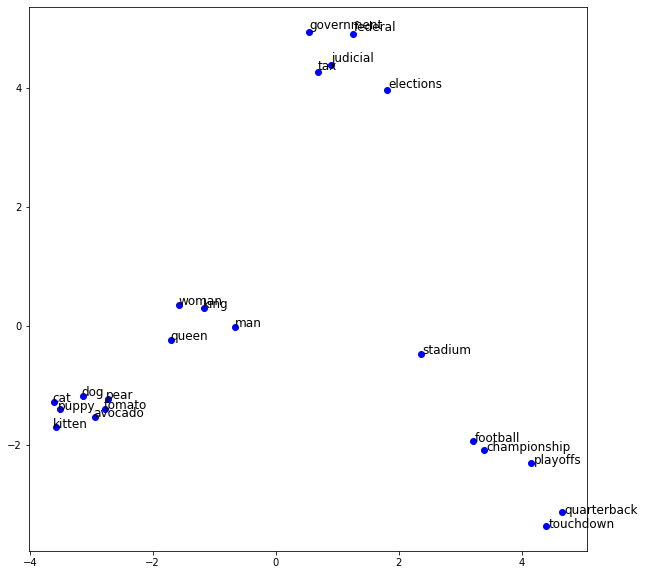

In [13]:
matplotlib.rc('figure', figsize=(10, 10))
for i, vector in enumerate(reduced_vectors):
    x = vector[0]
    y = vector[1]
    plt.plot(x,y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , words[i], fontsize=12)

## Using Glove

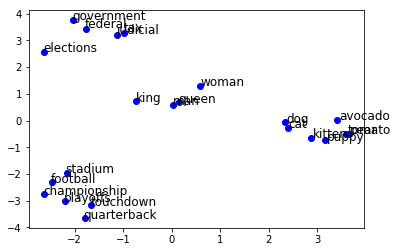

In [3]:
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

dimension_model = PCA(n_components=2)
reduced_vectors = dimension_model.fit_transform(vectors)

for i, vector in enumerate(reduced_vectors):
    x = vector[0]
    y = vector[1]
    plt.plot(x,y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , words[i], fontsize=12)



# Clustering Text

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
cluster_assignments = kmeans.fit_predict(reduced_vectors)
for cluster_assignment, word in zip(cluster_assignments, words):
    print(f"{word} assigned to cluster {cluster_assignment}")


woman assigned to cluster 1
king assigned to cluster 1
man assigned to cluster 1
queen assigned to cluster 1
puppy assigned to cluster 3
kitten assigned to cluster 3
cat assigned to cluster 3
quarterback assigned to cluster 2
football assigned to cluster 2
stadium assigned to cluster 2
touchdown assigned to cluster 2
dog assigned to cluster 3
government assigned to cluster 0
tax assigned to cluster 0
federal assigned to cluster 0
judicial assigned to cluster 0
elections assigned to cluster 0
avocado assigned to cluster 3
tomato assigned to cluster 3
pear assigned to cluster 3
championship assigned to cluster 2
playoffs assigned to cluster 2


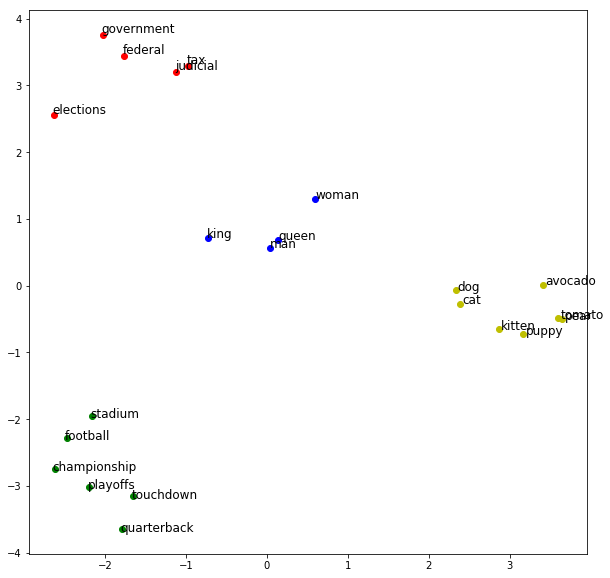

In [6]:
color_map = {
    0: "r",
    1: "b",
    2: "g",
    3: "y"
}

plt.rcParams["figure.figsize"] = (10,10)

for i, vector in enumerate(reduced_vectors):
    x = vector[0]
    y = vector[1]
    plt.plot(x,y, 'bo', c=color_map[cluster_assignments[i]])
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , words[i], fontsize=12)